<a href="https://colab.research.google.com/github/RittickSR/Sentiment-Analysis-on-Tweets/blob/main/Depression_detection_Tweets_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting depression in Tweets using N-gram with BOW and TF-IDF

# Installing and importing libraries

In [ ]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
import unicodedata
%matplotlib inline
ADDITIONAL_STOPWORDS = ['covfefe']
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Loading the Data

In [ ]:
tweets = pd.read_csv('sentiment_tweets3.csv')
tweets.head(20)

FileNotFoundError: ignored

In [ ]:
tweets.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [ ]:
tweets['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


# Splitting the Data in Training and Testing Sets

In [ ]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
print(tweets.iloc[trainIndex])
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

                                                 message  label
0      just had a real good moment. i missssssssss hi...      0
1             is reading manga  http://plurk.com/p/mzp1e      0
2      @comeagainjen http://twitpic.com/2y2lx - http:...      0
3      @lapcat Need to send 'em to my accountant tomo...      0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...                                                  ...    ...
10309  No Depression by G Herbo is my mood from now o...      1
10310  What do you do when depression succumbs the br...      1
10311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312  dont mistake a bad day with depression! everyo...      1
10313                                                  0      1

[10123 rows x 2 columns]


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [ ]:
trainData['label'].value_counts()

0    7848
1    2275
Name: label, dtype: int64

In [ ]:
trainData.head()


,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
testData['label'].value_counts()

0    152
1     39
Name: label, dtype: int64

In [ ]:
testData.head()

,message,label
64,@ WildstarB - Happy Rezday Captain - and tha...,0
86,"@aplusk thats beautiful, what a lovely thing t...",0
131,@myucan91 daamnn...:| im not even going to ask...,0
165,mad at @tacrain and @kylielanejonas for comple...,0
300,@shani_epa umm through this arrangement what w...,0


# N-Gram Analysis(Bi-Gram and Trigram)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
trainData.head()
def basic_clean(text):
 
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
words = basic_clean(''.join(str(trainData['message'].tolist())))
words[:20]

['real',
 'good',
 'moment',
 'miss',
 'much',
 'reading',
 'manga',
 'httpplurkcompmzp1e',
 'comeagainjen',
 'httptwitpiccom2y2lx',
 'httpwwwyoutubecomwatchvzogfqvh2me8',
 'lapcat',
 'need',
 'send',
 'em',
 'accountant',
 'tomorrow',
 'oddly',
 'wasnt',
 'even']

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]


(anxiety, depression)    137
(depression, anxiety)    134
(cant, wait)             102
(good, morning)           83
(im, going)               72
(last, night)             57
(mental, health)          52
(dont, know)              49
(feel, like)              43
(im, gonna)               41
(happy, birthday)         39
(good, luck)              38
dtype: int64

Text(0.5, 0, '# of Occurances')

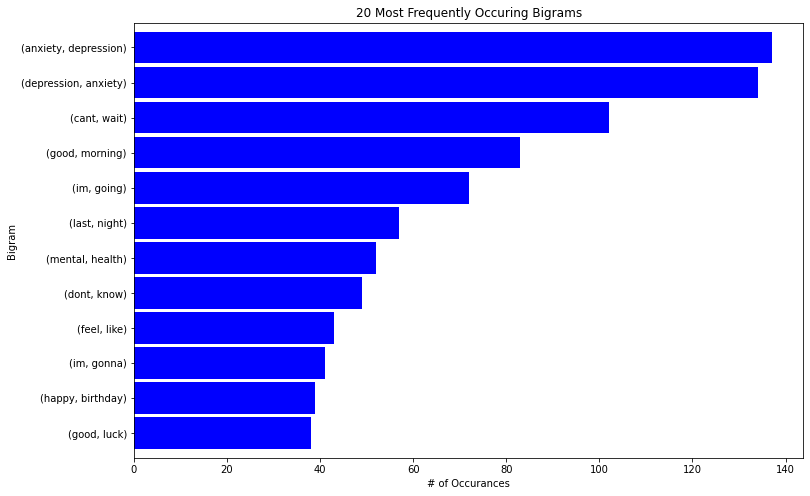

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:4]

(mom, depression, tied)           30
(depression, tied, kid)           30
(tied, kid, emotional)            30
(kid, emotional, intellectual)    29
dtype: int64

Text(0.5, 0, '# of Occurances')

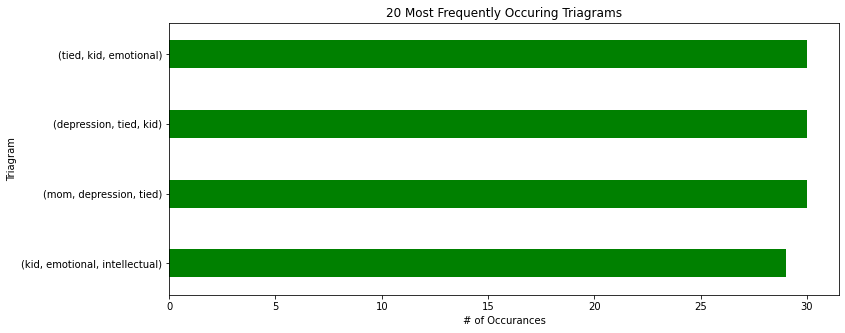

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:4]
trigrams_series.sort_values().plot.barh(color='green', width=.4, figsize=(12, 5))
plt.title('20 Most Frequently Occuring Triagrams')
plt.ylabel('Triagram')
plt.xlabel('# of Occurances')

In [ ]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [ ]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                   
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1
    
    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
    def normalize(self,x):
        return (1/(1+ np.exp(x)))
    def stratify(self,ret_value):
        if ret_value<0.25:
            return 'Very Depressive'
        elif ret_value>=0.25 and ret_value<0.6:
            return 'Mildly Depressive'
        elif ret_value>=0.6 and ret_value<=0.65:
            return 'Maybe'
        elif ret_value>0.65 and ret_value<0.91:
            return 'Mildly Happy'
        else:
            return 'Very Happy'                    
    def classify(self, processed_message):
        #range_calc=[0 for i in range(4)]
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                    #pDepressive=1/(1 + np.exp(-pDepressive))
                    #print('pDepressive',pDepressive)
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
                    #pDepressive=1/(1 + np.exp(-pDepressive))
                    #print('pDepressive',pDepressive)
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
                #pPositive=1/(1 + np.exp(-pPositive))
                #print('pPositive',pPositive)
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                    #pPositive=1/(1 + np.exp(-pPositive))
                    #print('pPositive',pPositive)
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
                    #pPositive=1/(1 + np.exp(-pPositive))
                    #print('pPositive',pPositive)
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        #pDepressive=1/(1 + np.exp(-pDepressive))
        #pPositive=1/(1 + np.exp(-pPositive))
        ret_value=self.normalize(pDepressive-pPositive)
        return self.stratify(ret_value), int(pDepressive>pPositive)
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = self.classify(processed_message)
            #if result[i][0]=='Mildly Happy':
                #print(message)
        return result

In [ ]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i][1] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i][1] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i][1] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i][1] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [ ]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'],preds_tf_idf)


Precision:  0.8571428571428571
Recall:  0.46153846153846156
F-score:  0.6
Accuracy:  0.8743455497382199


In [ ]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'],preds_bow)

Precision:  1.0
Recall:  0.20512820512820512
F-score:  0.3404255319148936
Accuracy:  0.837696335078534


# Predictions with TF-IDF

# Depressive Tweets

In [ ]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)[0]

'Very Depressive'

In [ ]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)[0]


'Very Depressive'

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_tf_idf.classify(pm)[0]

'Very Depressive'

In [ ]:
pm = process_message('I am officially done with @kanyewest')
sc_tf_idf.classify(pm)[0]


'Very Depressive'

In [ ]:
pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)[0]


'Mildly Depressive'

In [ ]:
pm = process_message('My depression will not let me work out')
sc_tf_idf.classify(pm)[0]


NameError: ignored

# Positive Tweets

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)[0]


'Very Happy'

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)[0]


In [ ]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_tf_idf.classify(pm)[0]

'Very Happy'

In [ ]:
pm = process_message('Got a sweater, now I\'m warm.')
sc_tf_idf.classify(pm)[0]

'Very Happy'

In [ ]:
pm = process_message('@mojustice I\'ve heard this fall. I\'m waiting too!')
sc_tf_idf.classify(pm)[0]

'Very Happy'

In [ ]:
pm=process_message('Aww bless.')
sc_tf_idf.classify(pm)[0]

'Mildly Happy'

# Predictions with Bag-of-Words (BOW)

# Depressive tweets

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(pm)[0]

'Very Depressive'

In [ ]:
pm = process_message('My depression will not let me work out')
sc_bow.classify(pm)[0]

'Very Depressive'

In [ ]:
pm = process_message('Feeling down...')
sc_bow.classify(pm)[0]

'Mildly Depressive'

# Positive Tweets

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)[0]

'Very Happy'

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_bow.classify(pm)[0]

'Very Happy'

In [ ]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_bow.classify(pm)[0]

'Very Happy'

In [ ]:
pm = process_message('Aww Bless.')
sc_bow.classify(pm)[0]

'Mildly Happy'